3.1.1
Tone har nytte av sammensatt konsum og fritid. Gå ut ifra at Tone sin nytte kan beskrives ved bruk av Cobb-Douglas funksjonen her nede:

U(c,l)=cθ⋅l1−θ,
der θ=0.5.
Tone har en arbeidsfri inntekt (m
) lik 100 (i ti-tall kroner). Hun kan ikke velge sin arbeidstid fritt. Dersom Tone jobber, må hun jobbe 40 timer per uke. Hun kan maksimalt jobbe 60 timer per uke (l0=60). Dersom Tone ikke tar en jobb, har hun tilgang til stønad.

Gå ut ifra at arbeidsmarkedet er «perfekt». Utled Tone sin statiske reservasjonslønn i disse to situasjonene: 1) stønaden er lik null, 2) stønaden er lik 100
. Gjør rede for dine matematiske beregninger.

Gi økonomisk intuisjon til hvorfor reservasjonslønna er ulik i disse to situasjonene. Illustrer grafisk. Du finne støtte til hvordan du kan lage grafer i dette dokumentet.

In [220]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Definerer symboler
w, m, c, theta, l, U,s, l0 = sp.symbols('w m c theta l U s l0', real=True)
# Maks arbeid
l0_num=60
# Hvis jobb
l_arbeid=40
#Inntekt utenom arbeid
m_num=100
#Stønad
s_num=100
# Tallverdi for theta
theta_num = 0.5

# Definer nyttefunksjonen
nytte_func = c**theta * l**(1-theta)

# Finner U når c=100 og l=60
U_verdi = nytte_func.subs({c: m_num, l: l0_num, theta: theta_num})

# Finner U når c = m_num og s_num altså 200 og l = 60 
U_verdi_2 = nytte_func.subs({c: m_num+s_num, l: l0_num, theta: theta_num})

# Løser for c
c_sol = sp.solve(sp.Eq(U, nytte_func), c)[0]

# Definer c som en funksjon av l ved hjelp av lambdify
c_func = sp.lambdify(l, c_sol.subs({U: U_verdi, theta: theta_num}))

# Definerer c som en funksjon av l ved hjelp av ny nytteverdi med stønad
c_func_2 = sp.lambdify(l, c_sol.subs({U: U_verdi_2, theta: theta_num}))

# Definer l-verdier fra 0.01 til 60
l_values = np.linspace(0.1, l0_num, 500)


5.00000000000000

In [205]:
# Situasjon 1: Ingen stønad
venstre1 = (m + l*w)**theta * (l0-l)**(1-theta)
hoyre1 = m**theta * l0**(1-theta)
eq1 = sp.Eq(venstre1, hoyre1)

# Løser ligning 1 for w
sol1 = sp.solve(eq1, w)[0]

# Situasjon 2: Stønad = 100
venstre2 = (m +l*w)**theta * (l0-l)**(1-theta)
hoyre2 = (m+s)**theta * l0**(1-theta)
eq2 = sp.Eq(venstre2, hoyre2)

# Løser ligning 2 for w
sol2 = sp.solve(eq2, w)[0]

sol_1_num = sol1.subs({theta: theta_num, l0: l0_num, l:l_arbeid,m:m_num})
sol_2_num = sol2.subs({theta: theta_num, l0: l0_num, l:l_arbeid,m:m_num, s:s_num})

# Setter opp budsjettbettingelsen for med og uten stønad
def wages(l_values):
    return m_num + sol_1_num * (l0_num-l_values)

def wages_2(l_values):
    return m_num+s_num + sol_2_num * (l0_num-l_values)

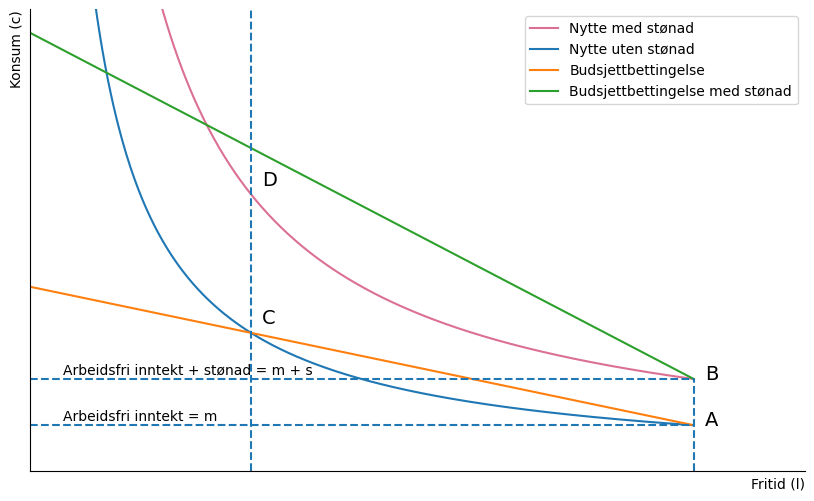

In [249]:
# Definerer en akse
def create_ax():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set(xlim=(0, 70))
    ax.set(ylim=(0, 1000))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    # i want it in the top left
    plt.xlabel('Fritid (l)',loc="right")
    plt.ylabel('Konsum (c)', loc="top")
    ax.set_xticks([])
    ax.set_yticks([])
    return fig, ax

fig, ax = create_ax()

# Plotter indifferenskurver
ax.plot(l_values,c_func_2(l_values), label ="Nytte med stønad", color="palevioletred")
ax.plot(l_values, c_func(l_values), label=f'Nytte uten stønad')
# Plotter budsjettbettingelser
ax.plot(l_values, wages(l_values), label="Budsjettbettingelse")
ax.plot(l_values, wages_2(l_values), label="Budsjettbettingelse med stønad")
# Viser arbeidsfri inntekt
ax.hlines(m_num,0,l0_num, linestyles="dashed")
ax.hlines(m_num+s_num,0,l0_num, linestyles="dashed")
# Viser hvor personen går i arbeid
ax.vlines(l0_num-l_arbeid,0,1000, linestyles="dashed")
# Viser hvor personen ikke går i arbeid
ax.vlines(l0_num,0,m_num+s_num, linestyles="dashed")
# Definerer noen punkter
ax.text(x=61,y=100, s="A", fontsize=14)
ax.text(x=61,y=200,s="B", fontsize=14)
ax.text(x=21,y=320, s="C", fontsize=14)
ax.text(x=21, y=620, s="D", fontsize=14)
# 
ax.text(x=3, y=111, s="Arbeidsfri inntekt = m")
#
ax.text(x=3, y=211, s="Arbeidsfri inntekt + stønad = m + s")
#

#
ax.legend()
plt.show()

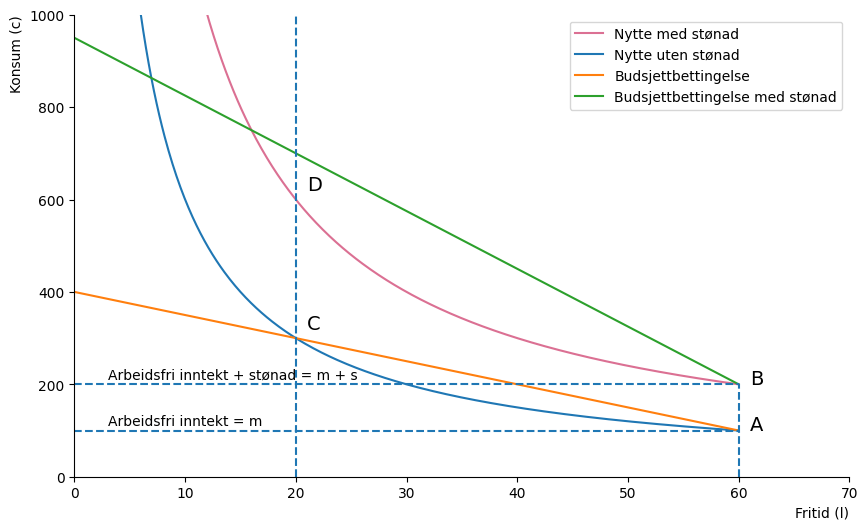

In [251]:
# Samme figur men med tall
# Definerer en akse
def create_ax():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set(xlim=(0, 70))
    ax.set(ylim=(0, 1000))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    # i want it in the top left
    plt.xlabel('Fritid (l)',loc="right")
    plt.ylabel('Konsum (c)', loc="top")
    return fig, ax

fig, ax = create_ax()

# Plotter indifferenskurver
ax.plot(l_values,c_func_2(l_values), label ="Nytte med stønad", color="palevioletred")
ax.plot(l_values, c_func(l_values), label=f'Nytte uten stønad')
# Plotter budsjettbettingelser
ax.plot(l_values, wages(l_values), label="Budsjettbettingelse")
ax.plot(l_values, wages_2(l_values), label="Budsjettbettingelse med stønad")
# Viser arbeidsfri inntekt
ax.hlines(m_num,0,l0_num, linestyles="dashed")
ax.hlines(m_num+s_num,0,l0_num, linestyles="dashed")
# Viser hvor personen går i arbeid
ax.vlines(l0_num-l_arbeid,0,1000, linestyles="dashed")
# Viser hvor personen ikke går i arbeid
ax.vlines(l0_num,0,m_num+s_num, linestyles="dashed")
# Definerer noen punkter
ax.text(x=61,y=100, s="A", fontsize=14)
ax.text(x=61,y=200,s="B", fontsize=14)
ax.text(x=21,y=320, s="C", fontsize=14)
ax.text(x=21, y=620, s="D", fontsize=14)
ax.text(x=3, y=111, s="Arbeidsfri inntekt = m")
#
ax.text(x=3, y=211, s="Arbeidsfri inntekt + stønad = m + s")
ax.legend()
plt.show()